In [0]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')

print('y_train shape', y_train.shape)
print(x_test.shape[0], 'test samples')

print('x_test shape', x_test.shape)
print(y_test.shape[0], 'test samples')


Using TensorFlow backend.


170500096/170498071 [==============================] - 4s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
y_train shape (50000, 1)
10000 test samples
x_test shape (10000, 32, 32, 3)
10000 test samples


In [0]:
# Declare variables
batch_size = 32 
# 32 examples in a mini-batch, smaller batch size means more updates in one epoch
epochs = 100
class_names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [0]:
def plot_images(x, y, number_of_images=2):
  fig, axes1 = plt.subplots(number_of_images,number_of_images,figsize=(10,10))
  for j in range(number_of_images):
      for k in range(number_of_images):
          i = np.random.choice(range(len(x)))
          title = class_names[y[i:i+1][0][0]]
          axes1[j][k].title.set_text(title)
          axes1[j][k].set_axis_off()
          axes1[j][k].imshow(x[i:i+1][0])        

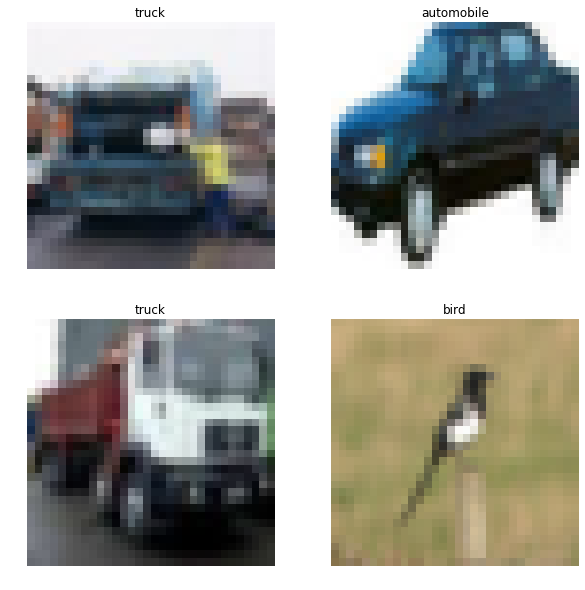

In [7]:
plot_images(x_train, y_train)

In [8]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024,activation='relu'))

model.add(tf.keras.layers.Dense(512, activation='relu'))

model.add(tf.keras.layers.Dense(1024,activation='softmax'))

model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))


W0827 14:21:05.150788 140069362141056 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [9]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(lr=0.0001, decay=1e-6),
              metrics=['accuracy'])

# Train the model
model.fit(x_train / 255.0, tf.keras.utils.to_categorical(y_train),
          batch_size=batch_size,
          shuffle=True,
          epochs=25,
          validation_data=(x_test / 255.0, tf.keras.utils.to_categorical(y_test))
          )

# Evaluate the model
scores = model.evaluate(x_test / 255.0, tf.keras.utils.to_categorical(y_test))

print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 336s 7ms/sample - loss: 2.2612 - acc: 0.1424 - val_loss: 2.2269 - val_acc: 0.1994
Epoch 2/25
50000/50000 [==============================] - 330s 7ms/sample - loss: 2.2119 - acc: 0.1560 - val_loss: 2.1725 - val_acc: 0.2266
Epoch 3/25
50000/50000 [==============================] - 332s 7ms/sample - loss: 2.1778 - acc: 0.1626 - val_loss: 2.1355 - val_acc: 0.2221
Epoch 4/25
50000/50000 [==============================] - 337s 7ms/sample - loss: 2.1504 - acc: 0.1714 - val_loss: 2.0933 - val_acc: 0.2408
Epoch 5/25
50000/50000 [==============================] - 336s 7ms/sample - loss: 2.1225 - acc: 0.1818 - val_loss: 2.0697 - val_acc: 0.2596
Epoch 6/25
50000/50000 [==============================] - 334s 7ms/sample - loss: 2.0965 - acc: 0.1922 - val_loss: 2.0251 - val_acc: 0.2947
Epoch 7/25
50000/50000 [==============================] - 336s 7ms/sample - loss: 2.0763 - acc: 0.2025 - val_l